### #3 (a) Binomial model.

Option Value: 2.9593889526587307


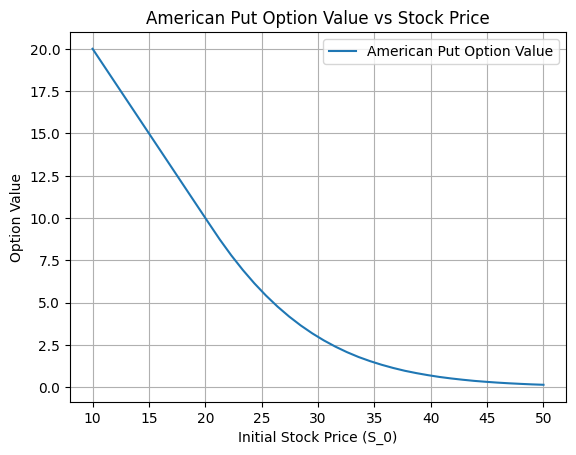

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def american_put_bintree(T, K, S_0, r, sigma, n):
    dt = T / n #time step
    u = np.exp(sigma * np.sqrt(dt)) #up-factor
    d = 1 / u #down-factor
    q = (np.exp(r * dt) - d) / (u - d) #risk-neutral probability
    discount = np.exp(-r * dt) #discount factor

    # stock price tree
    stock_tree = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S_0 * (u**(i - j)) * (d**j)

    # option value tree
    option_tree = np.zeros((n + 1, n + 1))
    option_tree[:, n] = np.maximum(K - stock_tree[:, n], 0)  #payoff at maturity

    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = discount * (q * option_tree[j, i + 1] + (1 - q) * option_tree[j + 1, i + 1])
            exercise = K - stock_tree[j, i]
            option_tree[j, i] = max(option_tree[j, i], exercise)

    return option_tree[0, 0]

# test case
value = american_put_bintree(1, 30, 30, 0.05, 0.3, 252)
print("Option Value:", value)

S_0_values = np.linspace(10, 50, 40)
option_values = [american_put_bintree(1, 30, S, 0.05, 0.3, 252) for S in S_0_values]

plt.plot(S_0_values, option_values, label="American Put Option Value")
plt.xlabel("Initial Stock Price (S_0)")
plt.ylabel("Option Value")
plt.title("American Put Option Value vs Stock Price")
plt.legend()
plt.grid(True)
plt.show()

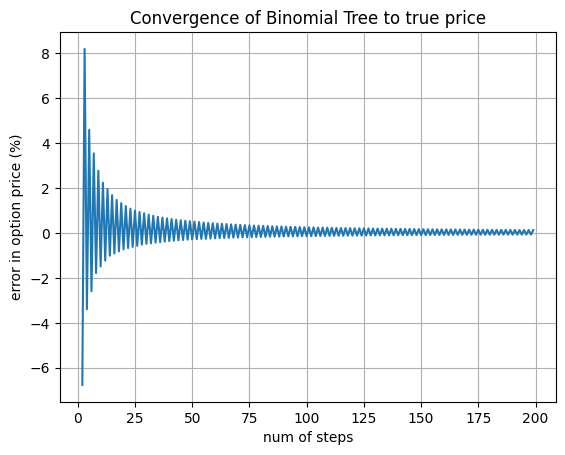

In [2]:
n_values = np.arange(2, 200)
option_values = np.array([american_put_bintree(1, 30, 30, 0.05, 0.3, n) for n in n_values])
C_true = 2.9610

plt.plot(n_values, (option_values - C_true)/C_true * 100)
plt.xlabel("num of steps")
plt.ylabel("error in option price (%)")
plt.title("Convergence of Binomial Tree to true price")
plt.grid(True)
plt.show()

### #3 (b) Trinomial model. 

In [3]:
def up_prob(r, sigma, T, n):
  q_u = ((np.exp(0.5*r*T/n)-np.exp(-sigma*np.sqrt(0.5*T/n)))/(np.exp(sigma*np.sqrt(0.5*T/n))-np.exp(-sigma*np.sqrt(0.5*T/n)))) ** 2
  return q_u

def down_prob(r, sigma, T, n):
  q_d = ((np.exp(sigma*np.sqrt(0.5*T/n))-np.exp(0.5*r*T/n))/(np.exp(sigma*np.sqrt(0.5*T/n))-np.exp(-sigma*np.sqrt(0.5*T/n)))) ** 2
  return q_d

def lat_prob(r, sigma, T, n):
  return 1-up_prob(r, sigma, T, n)-down_prob(r, sigma, T, n)

Option Value: 2.95971064595353


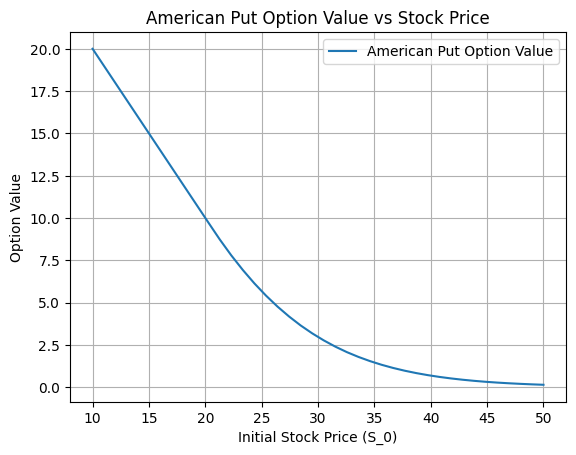

In [4]:
def american_put_tritree(T, K, S_0, r, sigma, n):
    dt = T / n #time step
    u = np.exp(sigma * np.sqrt(2*dt)) #up-factor
    d = 1 / u #down-factor
    pu = up_prob(r, sigma, T, n) # up probability
    pd = down_prob(r, sigma, T, n) # down probability
    pl = lat_prob(r, sigma, T, n) # lateral probability
    discount = np.exp(-r * dt) #discount factor

    # stock price tree
    stock_tree = np.zeros((2*(n + 1) - 1, n + 1))
    for i in range(n + 1):
        for j in range(2*(i + 1) - 1):
            stock_tree[j, i] = S_0 * (u**(math.floor((2*i - j)*0.5))) * (d**math.floor(j*0.5))
    # option value tree
    option_tree = np.zeros((2*(n + 1) - 1, n + 1))
    option_tree[:, n] = np.maximum(K - stock_tree[:, n], 0)  #payoff at maturity

    # backward induction
    for i in range(n-1, -1, -1):
        for j in range(2*(i + 1) - 1):
            option_tree[j, i] = discount * (pu * option_tree[j, i + 1] + pl * option_tree[j + 1, i + 1] + pd * option_tree[j + 2, i + 1])
            exercise = K - stock_tree[j, i]
            option_tree[j, i] = max(option_tree[j, i], exercise)

    return option_tree[0, 0]

# test case
value = american_put_tritree(1, 30, 30, 0.05, 0.3, 252)
print("Option Value:", value)

S_0_values = np.linspace(10, 50, 40)
option_values = [american_put_tritree(1, 30, S, 0.05, 0.3, 252) for S in S_0_values]

plt.plot(S_0_values, option_values, label="American Put Option Value")
plt.xlabel("Initial Stock Price (S_0)")
plt.ylabel("Option Value")
plt.title("American Put Option Value vs Stock Price")
plt.legend()
plt.grid(True)
plt.show()

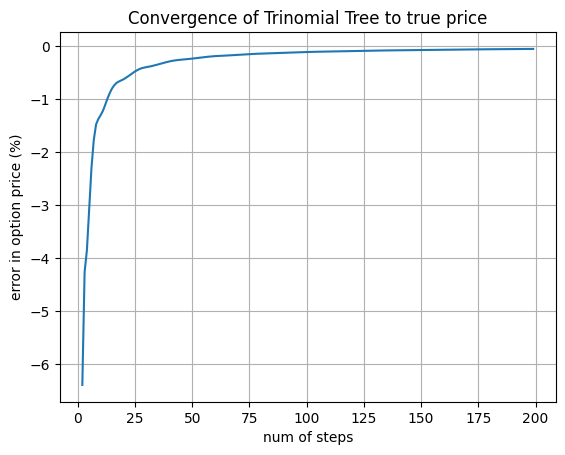

In [5]:
n_values = np.arange(2, 200)
option_values = np.array([american_put_tritree(1, 30, 30, 0.05, 0.3, n) for n in n_values])
C_true = 2.9610

plt.plot(n_values, (option_values - C_true)/C_true * 100)
plt.xlabel("num of steps")
plt.ylabel("error in option price (%)")
plt.title("Convergence of Trinomial Tree to true price")
plt.grid(True)
plt.show()

### #3 (c) Convergence of Binomial and Trinomial Trees to the true price. 

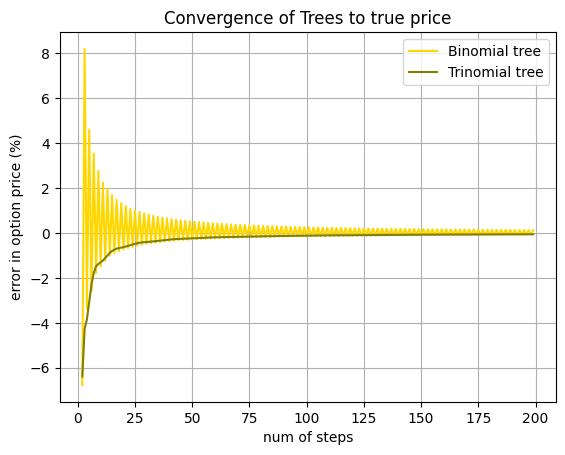

In [6]:
n_values = np.arange(2, 200)

option_values_bi = np.array([american_put_bintree(1, 30, 30, 0.05, 0.3, n) for n in n_values])
option_values_tri = np.array([american_put_tritree(1, 30, 30, 0.05, 0.3, n) for n in n_values])
C_true = 2.9610

plt.plot(n_values, (option_values_bi - C_true)/C_true * 100, label='Binomial tree', c='gold')
plt.plot(n_values, (option_values_tri - C_true)/C_true * 100, label='Trinomial tree', c='olive')
plt.xlabel("num of steps")
plt.ylabel("error in option price (%)")
plt.title("Convergence of Trees to true price")
plt.legend()
plt.grid(True)
plt.show()